In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error
from sklearn import model_selection
from pprint import pprint
from sklearn.preprocessing import StandardScaler, LabelEncoder

In [2]:
# Create Dataframe object
df = pd.read_csv('D:\ITC\Semester II\Data Mining\Project\wineQualityReds.csv')

df

,fixed.acidity,volatile.acidity,citric.acid,residual.sugar,chlorides,free.sulfur.dioxide,total.sulfur.dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.700,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4,5
1,7.8,0.880,0.00,2.6,0.098,25.0,67.0,0.99680,3.20,0.68,9.8,5
2,7.8,0.760,0.04,2.3,0.092,15.0,54.0,0.99700,3.26,0.65,9.8,5
3,11.2,0.280,0.56,1.9,0.075,17.0,60.0,0.99800,3.16,0.58,9.8,6
4,7.4,0.700,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4,5
...,...,...,...,...,...,...,...,...,...,...,...,...
1594,6.2,0.600,0.08,2.0,0.090,32.0,44.0,0.99490,3.45,0.58,10.5,5
1595,5.9,0.550,0.10,2.2,0.062,39.0,51.0,0.99512,3.52,0.76,11.2,6
1596,6.3,0.510,0.13,2.3,0.076,29.0,40.0,0.99574,3.42,0.75,11.0,6
1597,5.9,0.645,0.12,2.0,0.075,32.0,44.0,0.99547,3.57,0.71,10.2,5


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1599 entries, 0 to 1598
Data columns (total 12 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   fixed.acidity         1582 non-null   float64
 1   volatile.acidity      1599 non-null   float64
 2   citric.acid           1597 non-null   float64
 3   residual.sugar        1599 non-null   float64
 4   chlorides             1591 non-null   float64
 5   free.sulfur.dioxide   1599 non-null   float64
 6   total.sulfur.dioxide  1599 non-null   float64
 7   density               1599 non-null   float64
 8   pH                    1599 non-null   float64
 9   sulphates             1592 non-null   float64
 10  alcohol               1599 non-null   float64
 11  quality               1599 non-null   int64  
dtypes: float64(11), int64(1)
memory usage: 150.0 KB


In [4]:
df.describe()

,fixed.acidity,volatile.acidity,citric.acid,residual.sugar,chlorides,free.sulfur.dioxide,total.sulfur.dioxide,density,pH,sulphates,alcohol,quality
count,1582.000000,1599.000000,1597.000000,1599.000000,1591.000000,1599.000000,1599.000000,1599.000000,1599.000000,1592.000000,1599.000000,1599.000000
mean,8.318015,0.527821,0.270983,2.538806,0.087426,15.874922,46.467792,0.996747,3.311113,0.657657,10.422983,5.636023
std,1.742053,0.179060,0.194788,1.409928,0.047128,10.460157,32.895324,0.001887,0.154386,0.166599,1.065668,0.807569
min,4.600000,0.120000,0.000000,0.900000,0.012000,1.000000,6.000000,0.990070,2.740000,0.330000,8.400000,3.000000
25%,7.100000,0.390000,0.090000,1.900000,0.070000,7.000000,22.000000,0.995600,3.210000,0.550000,9.500000,5.000000
50%,7.900000,0.520000,0.260000,2.200000,0.079000,14.000000,38.000000,0.996750,3.310000,0.620000,10.200000,6.000000
75%,9.200000,0.640000,0.420000,2.600000,0.090000,21.000000,62.000000,0.997835,3.400000,0.730000,11.100000,6.000000
max,15.900000,1.580000,1.000000,15.500000,0.611000,72.000000,289.000000,1.003690,4.010000,2.000000,14.900000,8.000000


In [5]:
df.isnull().sum()

fixed.acidity           17
volatile.acidity         0
citric.acid              2
residual.sugar           0
chlorides                8
free.sulfur.dioxide      0
total.sulfur.dioxide     0
density                  0
pH                       0
sulphates                7
alcohol                  0
quality                  0
dtype: int64

In [6]:
# Fill null value
cateogry_columns=df.select_dtypes(include=['object']).columns.tolist()
integer_columns=df.select_dtypes(include=['int64','float64']).columns.tolist()

for column in df:
    if df[column].isnull().any():
        if(column in cateogry_columns):
            df[column]=df[column].fillna(df[column].mode()[0])
        else:
            df[column]=df[column].fillna(df[column].mean())

In [7]:
df.isnull().sum()

fixed.acidity           0
volatile.acidity        0
citric.acid             0
residual.sugar          0
chlorides               0
free.sulfur.dioxide     0
total.sulfur.dioxide    0
density                 0
pH                      0
sulphates               0
alcohol                 0
quality                 0
dtype: int64

In [8]:
df.isna().any()

fixed.acidity           False
volatile.acidity        False
citric.acid             False
residual.sugar          False
chlorides               False
free.sulfur.dioxide     False
total.sulfur.dioxide    False
density                 False
pH                      False
sulphates               False
alcohol                 False
quality                 False
dtype: bool

# Feature selection
Using Corelation

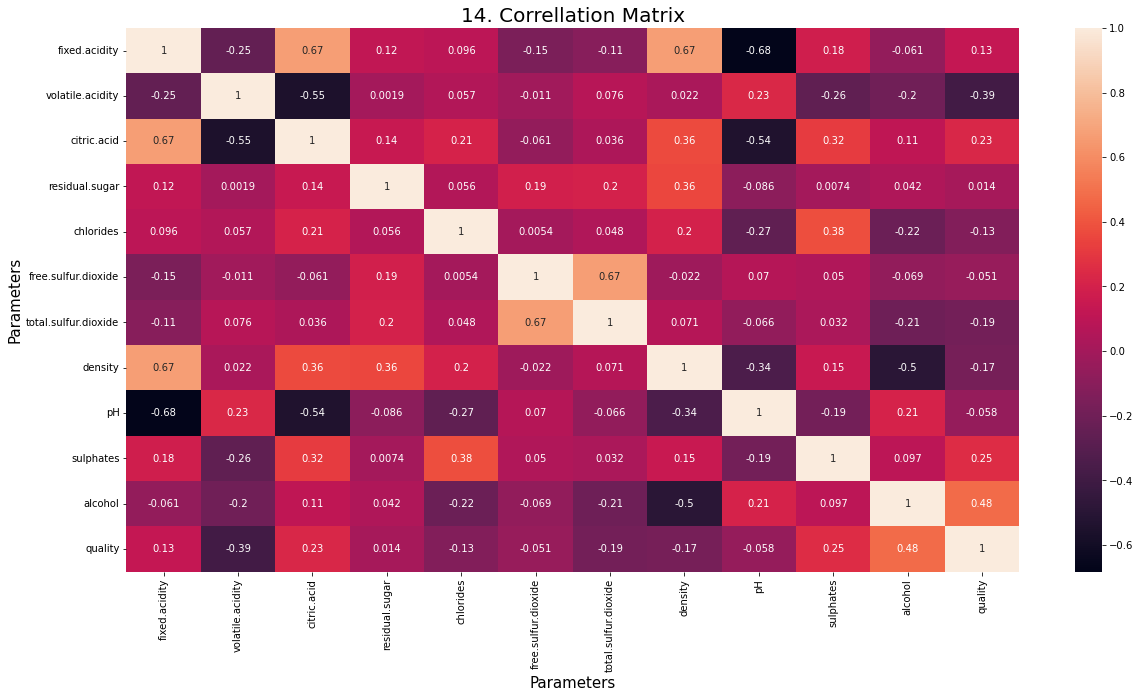

In [9]:
# # ploting heatmap
# plt.figure(figsize=[19,10],facecolor='blue')
# sns.heatmap(df.corr(),annot=True)

plt.figure(figsize = (20, 10))
sns.heatmap(df.corr(), annot = True)
plt.title('14. Correllation Matrix', fontsize = 20)
plt.xlabel('Parameters', fontsize = 15) 
plt.ylabel('Parameters', fontsize = 15) 
plt.show()

In [10]:
# with the following function we can select highly correlated features
# it will remove the first feature that is correlated with anything other feature

def correlation(dataset, threshold):
    col_corr = set()    #set of all the names of correlated columns
    corr_matrix = dataset.corr()
    for i in range(len(corr_matrix.columns)):
        for j in range(i):
            if abs(corr_matrix.iloc[i, j]) > threshold:   # we are interested in absolute coeff value
                colname = corr_matrix.columns[i]   # getting the name of colum
                col_corr.add(colname)
    return col_corr

In [11]:
corr_features = correlation(df, 0.7)
len(set(corr_features))

0

In [12]:
corr_features

set()

In [13]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1599 entries, 0 to 1598
Data columns (total 12 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   fixed.acidity         1599 non-null   float64
 1   volatile.acidity      1599 non-null   float64
 2   citric.acid           1599 non-null   float64
 3   residual.sugar        1599 non-null   float64
 4   chlorides             1599 non-null   float64
 5   free.sulfur.dioxide   1599 non-null   float64
 6   total.sulfur.dioxide  1599 non-null   float64
 7   density               1599 non-null   float64
 8   pH                    1599 non-null   float64
 9   sulphates             1599 non-null   float64
 10  alcohol               1599 non-null   float64
 11  quality               1599 non-null   int64  
dtypes: float64(11), int64(1)
memory usage: 150.0 KB


# Outlier Detection and Treatment Using IQR

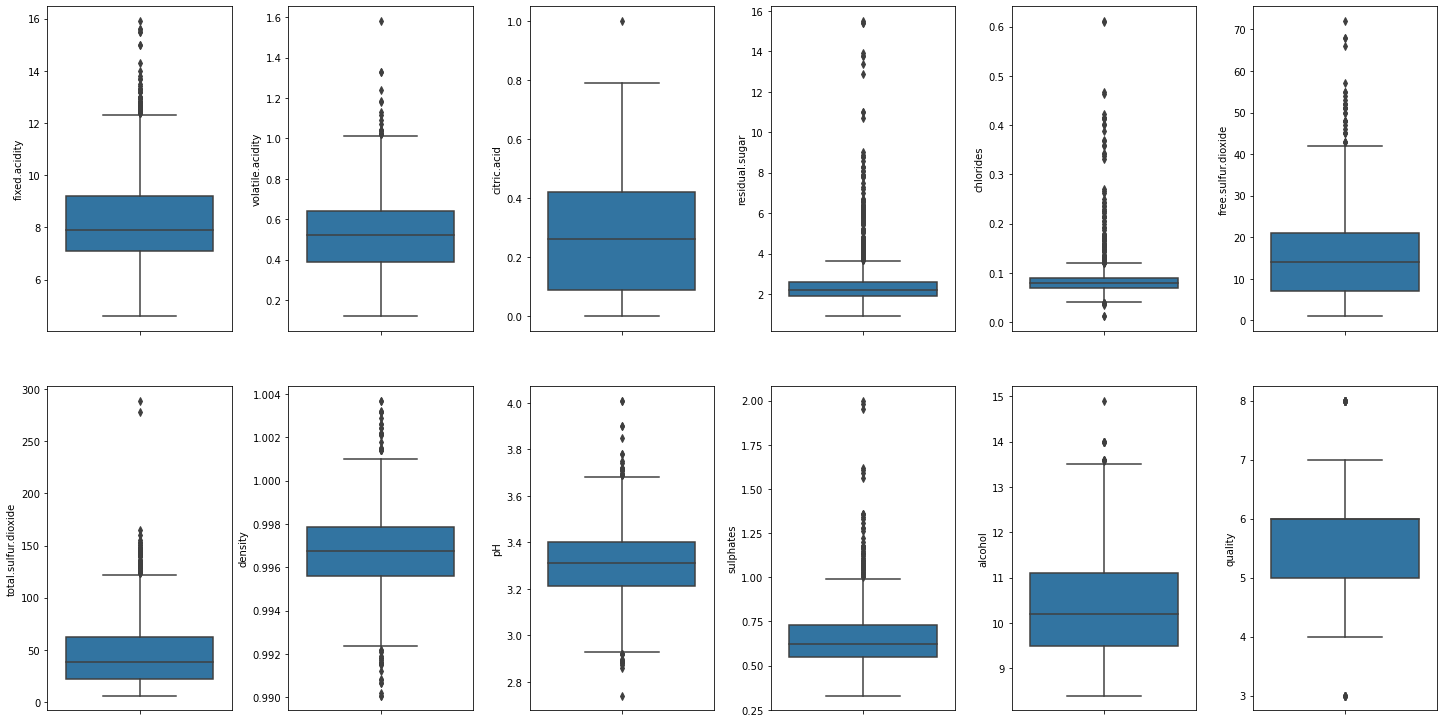

In [14]:
# create box plots
fig, ax = plt.subplots(ncols=6, nrows=2, figsize=(20,10))
index = 0
ax = ax.flatten()

for col, value in df.items():
    if col != 'type':
        sns.boxplot(y=col, data=df, ax=ax[index])
        index += 1
plt.tight_layout(pad=0.5, w_pad=0.7, h_pad=5.0)

In [15]:
# Create function to detect and treat outlier
def outlier_detection(df_in, datacolumn):
    sorted(datacolumn)
    Q1,Q3 = np.percentile(datacolumn , [25,75])
    IQR = Q3 - Q1
    lower_range = Q1 - (1.5 * IQR)
    upper_range = Q3 + (1.5 * IQR)
    data_out = df_in.drop(df_in[(datacolumn > upper_range) | (datacolumn < lower_range) ].index , inplace=True)    
    return data_out

In [16]:
outlier_detection(df, df["fixed.acidity"])
outlier_detection(df, df["volatile.acidity"])
outlier_detection(df, df["citric.acid"])
outlier_detection(df, df["residual.sugar"])
outlier_detection(df, df["chlorides"])
outlier_detection(df, df["free.sulfur.dioxide"])
outlier_detection(df, df["total.sulfur.dioxide"])
outlier_detection(df, df["density"])
outlier_detection(df, df["pH"])
outlier_detection(df, df["sulphates"])
outlier_detection(df, df["alcohol"])
outlier_detection(df, df["quality"])

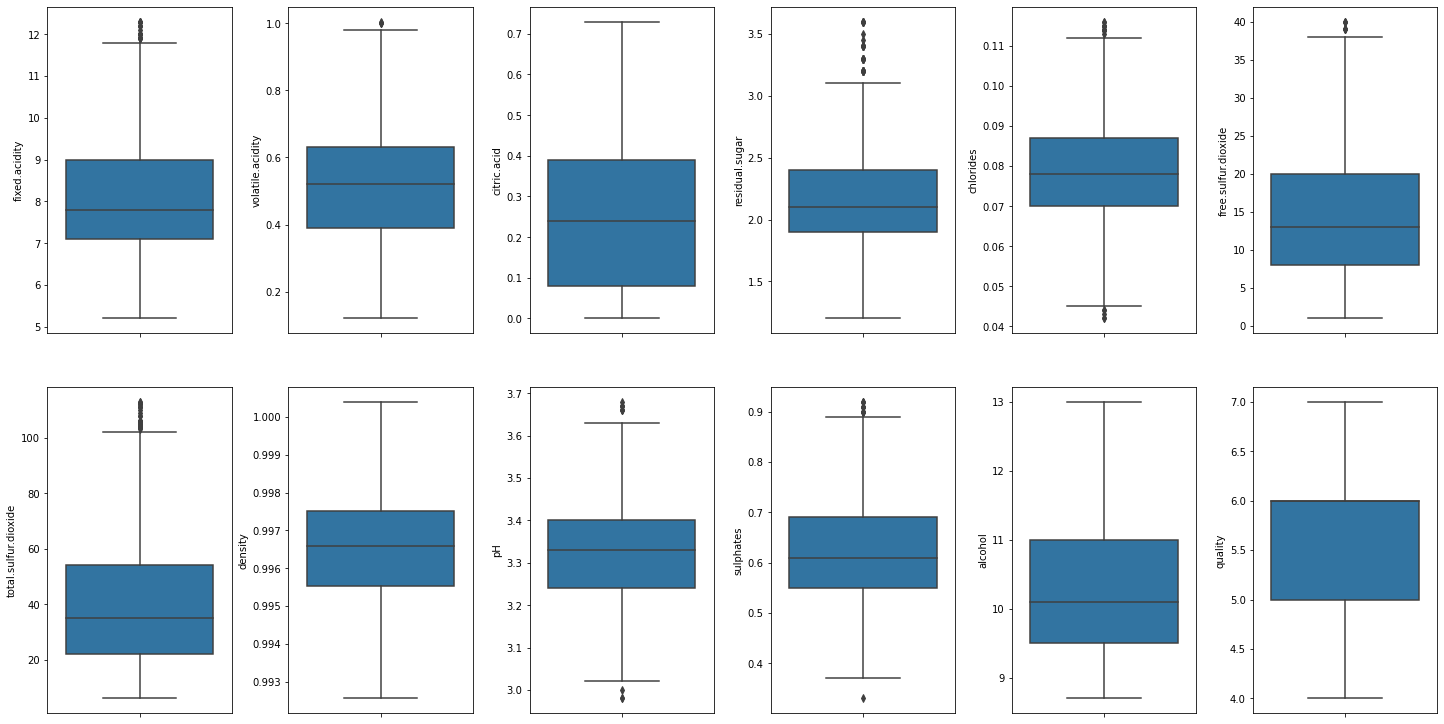

In [17]:
# create box plots
fig, ax = plt.subplots(ncols=6, nrows=2, figsize=(20,10))
index = 0
ax = ax.flatten()

for col, value in df.items():
    if col != 'type':
        sns.boxplot(y=col, data=df, ax=ax[index])
        index += 1
plt.tight_layout(pad=0.5, w_pad=0.7, h_pad=5.0)

# Data Visualization

<AxesSubplot:xlabel='quality', ylabel='fixed.acidity'>

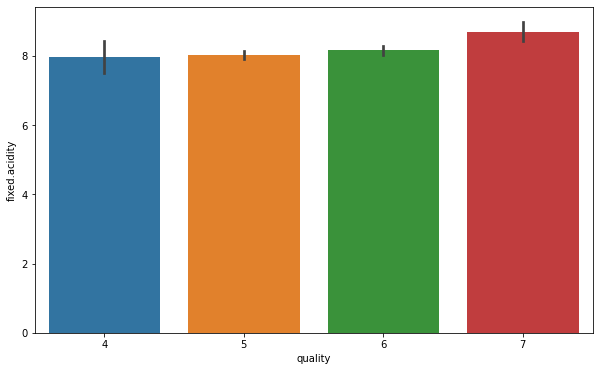

In [18]:
# Composition of citric acid go higher as we go higher in the quality of the wine

fig = plt.figure(figsize = (10,6))
sns.barplot(x = 'quality', y = 'fixed.acidity', data = df)

<AxesSubplot:xlabel='quality', ylabel='volatile.acidity'>

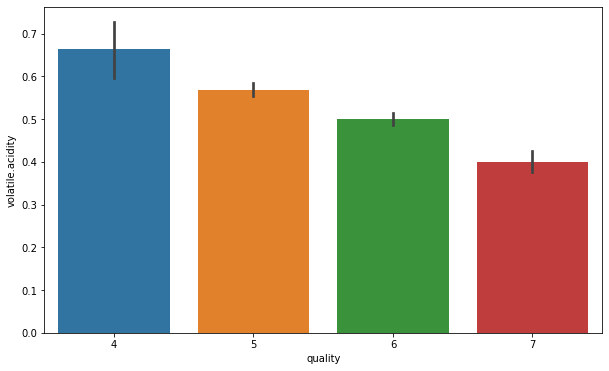

In [19]:
# Composition of citric acid go higher as we go higher in the quality of the wine

fig = plt.figure(figsize = (10,6))
sns.barplot(x = 'quality', y = 'volatile.acidity', data = df)

<AxesSubplot:xlabel='quality', ylabel='citric.acid'>

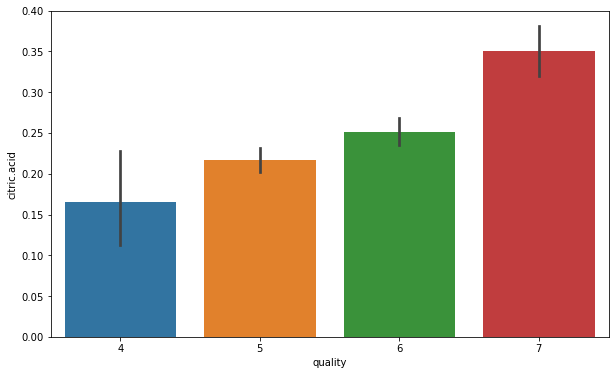

In [20]:
# Composition of citric acid go higher as we go higher in the quality of the wine

fig = plt.figure(figsize = (10,6))
sns.barplot(x = 'quality', y = 'citric.acid', data = df)

<AxesSubplot:xlabel='quality', ylabel='residual.sugar'>

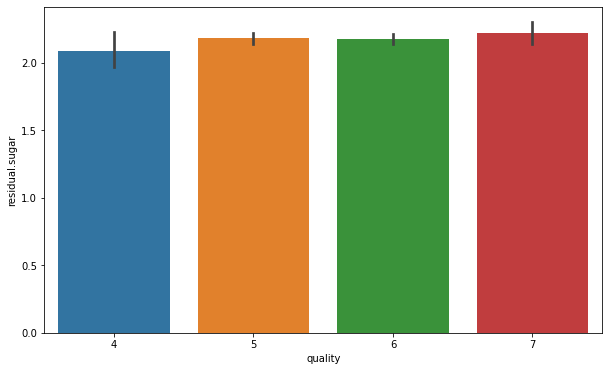

In [21]:
# Composition of citric acid go higher as we go higher in the quality of the wine

fig = plt.figure(figsize = (10,6))
sns.barplot(x = 'quality', y = 'residual.sugar', data = df)

<AxesSubplot:xlabel='quality', ylabel='chlorides'>

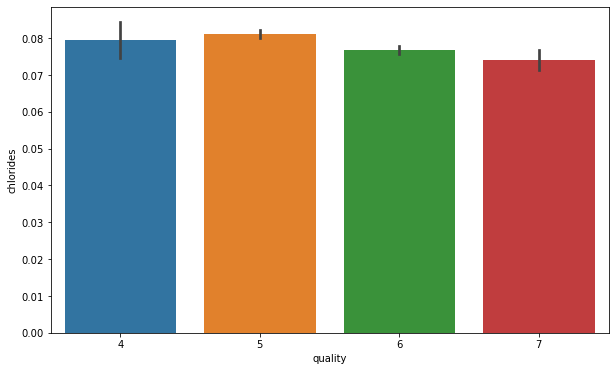

In [22]:
# Composition of citric acid go higher as we go higher in the quality of the wine

fig = plt.figure(figsize = (10,6))
sns.barplot(x = 'quality', y = 'chlorides', data = df)

<AxesSubplot:xlabel='quality', ylabel='free.sulfur.dioxide'>

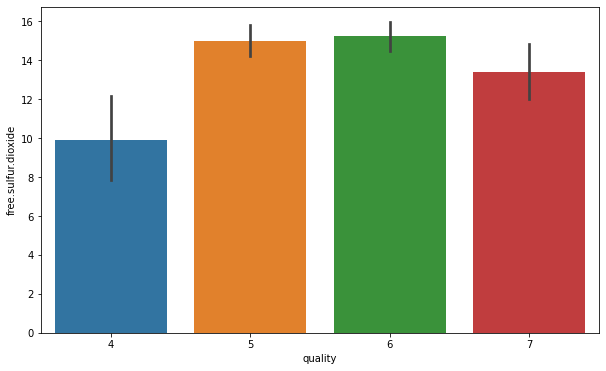

In [23]:
# Composition of citric acid go higher as we go higher in the quality of the wine

fig = plt.figure(figsize = (10,6))
sns.barplot(x = 'quality', y = 'free.sulfur.dioxide', data = df)

<AxesSubplot:xlabel='quality', ylabel='total.sulfur.dioxide'>

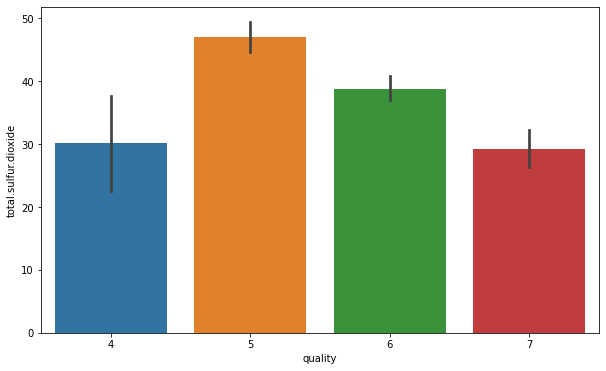

In [24]:
# Composition of citric acid go higher as we go higher in the quality of the wine

fig = plt.figure(figsize = (10,6))
sns.barplot(x = 'quality', y = 'total.sulfur.dioxide', data = df)

<AxesSubplot:xlabel='quality', ylabel='density'>

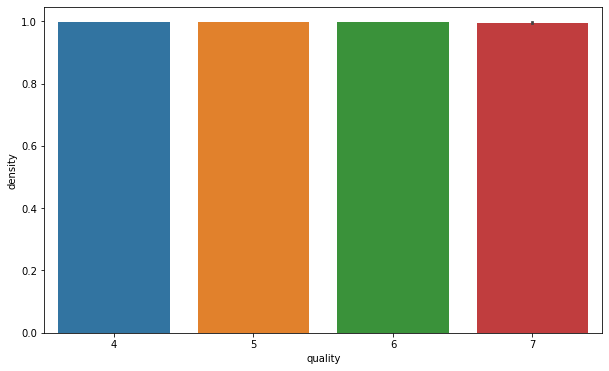

In [25]:
# Composition of citric acid go higher as we go higher in the quality of the wine

fig = plt.figure(figsize = (10,6))
sns.barplot(x = 'quality', y = 'density', data = df)

<AxesSubplot:xlabel='quality', ylabel='pH'>

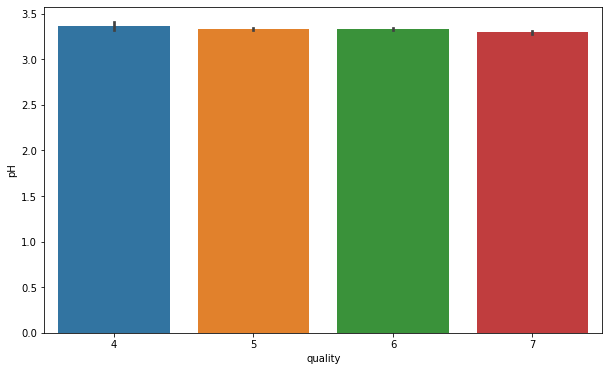

In [26]:
# Composition of citric acid go higher as we go higher in the quality of the wine

fig = plt.figure(figsize = (10,6))
sns.barplot(x = 'quality', y = 'pH', data = df)


<AxesSubplot:xlabel='quality', ylabel='sulphates'>

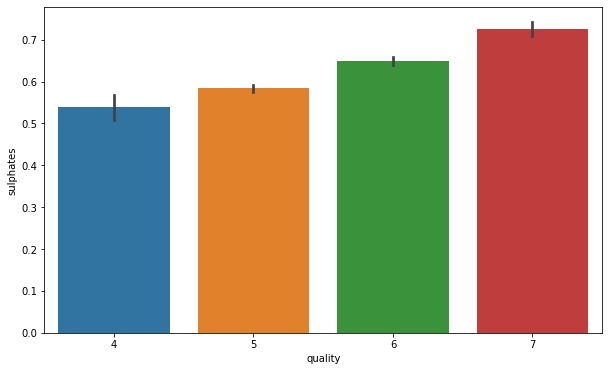

In [27]:
# Composition of citric acid go higher as we go higher in the quality of the wine

fig = plt.figure(figsize = (10,6))
sns.barplot(x = 'quality', y = 'sulphates', data = df)

<AxesSubplot:xlabel='quality', ylabel='sulphates'>

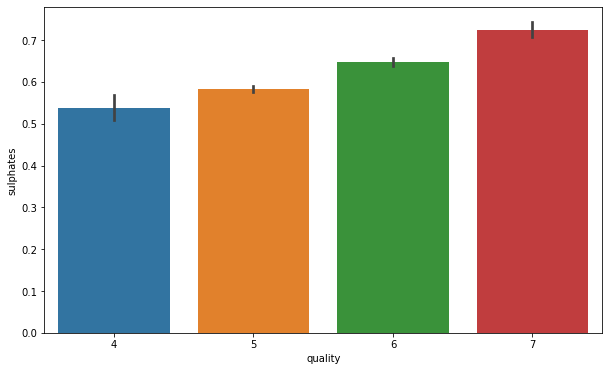

In [28]:
# Composition of citric acid go higher as we go higher in the quality of the wine

fig = plt.figure(figsize = (10,6))
sns.barplot(x = 'quality', y = 'sulphates', data = df)


<AxesSubplot:xlabel='quality', ylabel='alcohol'>

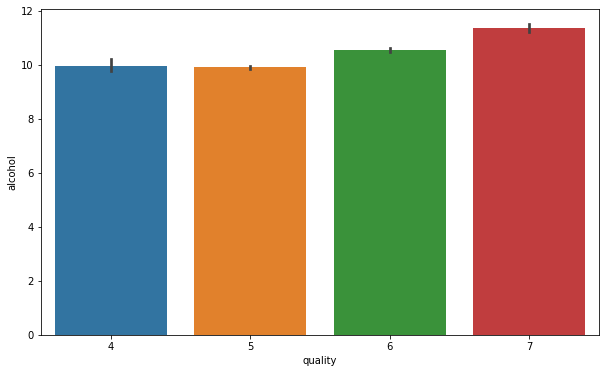

In [29]:
# Composition of citric acid go higher as we go higher in the quality of the wine

fig = plt.figure(figsize = (10,6))
sns.barplot(x = 'quality', y = 'alcohol', data = df)

<AxesSubplot:xlabel='quality', ylabel='quality'>

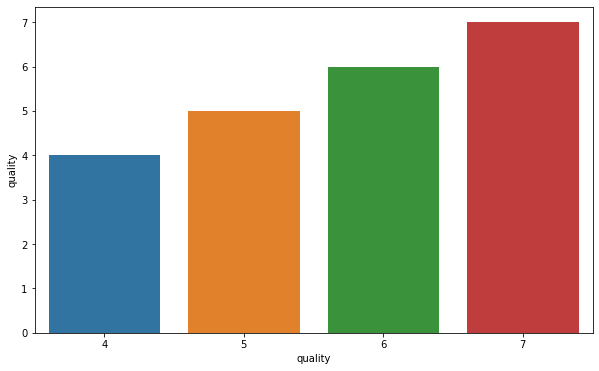

In [30]:
# Composition of citric acid go higher as we go higher in the quality of the wine

fig = plt.figure(figsize = (10,6))
sns.barplot(x = 'quality', y = 'quality', data = df)

<AxesSubplot:title={'center':'Correlation with quality'}>

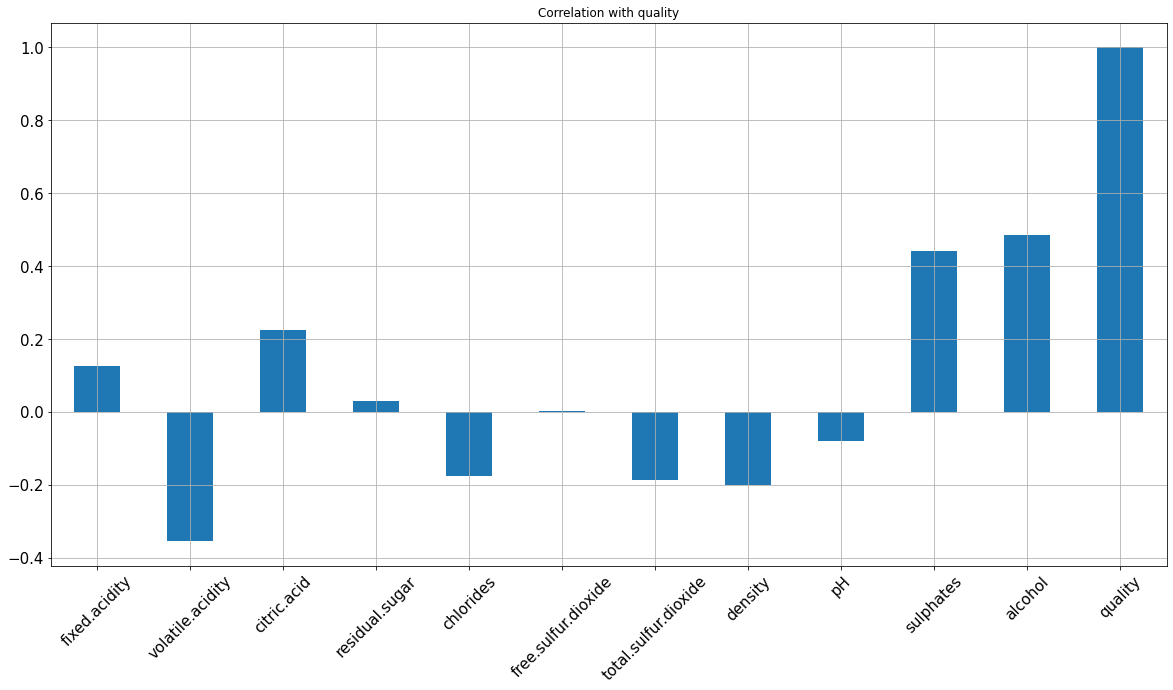

In [31]:
#Correlation with Quality with respect to attributes
df.corrwith(df.quality).plot.bar(
        figsize = (20, 10), title = "Correlation with quality", fontsize = 15,
        rot = 45, grid = True)

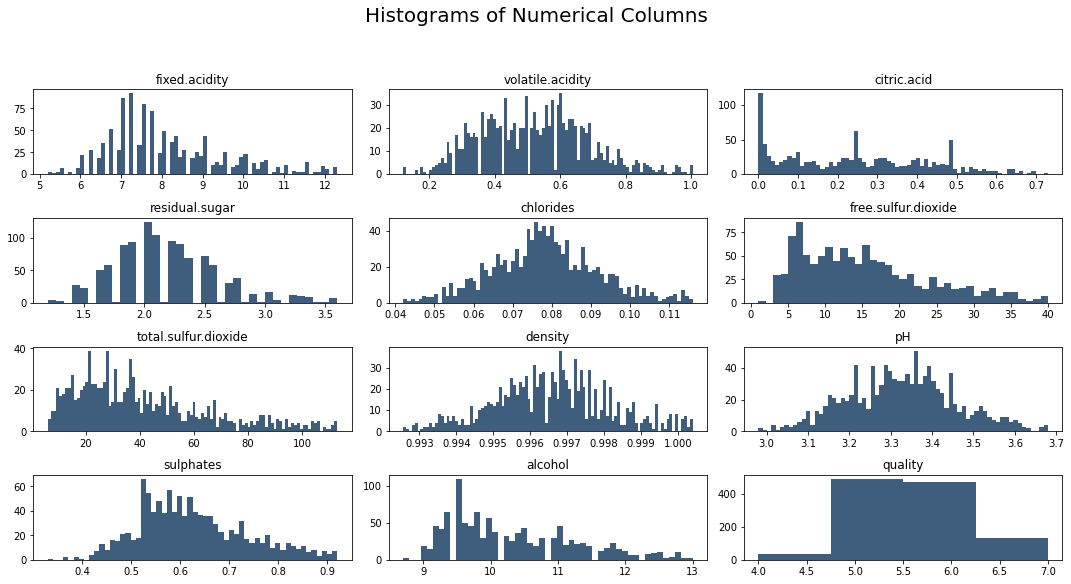

In [32]:
## Histograms
fig = plt.figure(figsize=(15, 12))
plt.suptitle('Histograms of Numerical Columns', fontsize=20)
for i in range(df.shape[1]):
    plt.subplot(6, 3, i + 1)
    f = plt.gca()
    f.set_title(df.columns.values[i])

    vals = np.size(df.iloc[:, i].unique())
    if vals >= 100:
        vals = 100
    
    plt.hist(df.iloc[:, i], bins=vals, color='#3F5D7D')
plt.tight_layout(rect=[0, 0.03, 1, 0.95])

# Prepare data for inputs

In [33]:
# converting the response variables(3-7) as binary response variables that is either good or bad

#names = ['bad', 'good']
#bins = (2, 6.5, 8)

df['quality'] = df['quality'].map({3 : 'bad', 4 :'bad', 5: 'bad',
                                      6: 'good', 7: 'good', 8: 'good'})

# data.to_csv (r'C:\Users\Hsophy\Downloads\Documents\export_dataframe_test.csv', index = None, header=True)

In [34]:
# analyzing the different values present in the dependent variable(quality column)
df['quality'].value_counts()

good    597
bad     519
Name: quality, dtype: int64

C:\Users\Hsophy\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='quality', ylabel='count'>

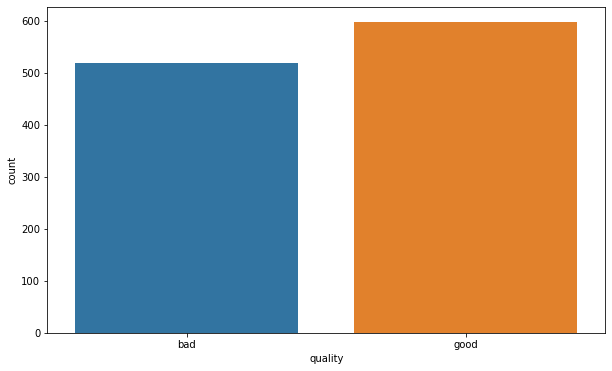

In [35]:
plt.figure(figsize=(10, 6))
sns.countplot(df['quality'])

In [36]:
from sklearn.preprocessing import LabelEncoder

le = LabelEncoder()

df['quality'] = le.fit_transform(df['quality'])

df['quality'].value_counts

<bound method IndexOpsMixin.value_counts of 0       0
1       0
2       0
3       1
4       0
       ..
1594    0
1595    1
1596    1
1597    0
1598    1
Name: quality, Length: 1116, dtype: int32>

C:\Users\Hsophy\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='quality', ylabel='count'>

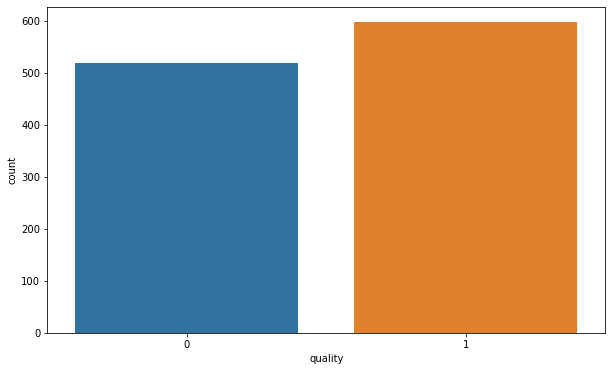

In [37]:
plt.figure(figsize=(10, 6))
sns.countplot(df['quality'])
# sns.countplot(data['category'])

In [38]:
# dividing the dataset into dependent and independent variables

x = df.iloc[:,:11]
y = df.iloc[:,11]

# determining the shape of x and y.
print(x.shape)
print(y.shape)

(1116, 11)
(1116,)


In [39]:
# dividing the dataset in training and testing set

from sklearn.model_selection import train_test_split

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.3, random_state = 100)

# determining the shapes of training and testing sets
print(x_train.shape)
print(y_train.shape)
print(x_test.shape)
print(y_test.shape)

(781, 11)
(781,)
(335, 11)
(335,)


In [40]:
sc = MinMaxScaler()
x_train = sc.fit_transform(x_train)
x_test = sc.fit_transform(x_test)

In [41]:
x_train

array([[0.31428571, 0.16949153, 0.46575342, ..., 0.6       , 0.52542373,
        0.53488372],
       [0.61428571, 0.49717514, 0.42465753, ..., 0.18571429, 1.        ,
        0.30232558],
       [0.64285714, 0.36158192, 0.64383562, ..., 0.37142857, 0.54237288,
        0.48837209],
       ...,
       [0.57142857, 0.67231638, 0.32876712, ..., 0.2       , 0.44067797,
        0.27906977],
       [0.42857143, 0.47457627, 0.38356164, ..., 0.58571429, 0.47457627,
        0.30232558],
       [0.5       , 0.37288136, 0.5890411 , ..., 0.32857143, 0.71186441,
        0.34883721]])

## Applying Model

In [53]:
from sklearn.metrics import accuracy_score
from sklearn.metrics import classification_report

## RandomForestClassifier

In [61]:
from sklearn.ensemble import RandomForestClassifier

# creating the model
Ranmodel = RandomForestClassifier(n_estimators = 200)

# feeding the training set into the model
Ranmodel.fit(x_train, y_train)

# predicting the results for the train set
y_pred_train_rf = Ranmodel.predict(x_train)

# predicting the results for the test set
y_pred_rf = Ranmodel.predict(x_test)

# # calculating the training and testing accuracies
# print("Training accuracy :", model.score(x_train, y_train))
# print("Testing accuracy :", model.score(x_test, y_test))
print("Training accuracy :", Ranmodel.score(x_train, y_train)*100)
cr_train = classification_report(y_train, y_pred_train_rf)
print(cr_train)
print("Accuracy Score:",accuracy_score(y_test,y_pred_rf)*100)
cr = classification_report(y_test, y_pred_rf)
print(cr)

Training accuracy : 100.0
              precision    recall  f1-score   support

           0       1.00      1.00      1.00       368
           1       1.00      1.00      1.00       413

    accuracy                           1.00       781
   macro avg       1.00      1.00      1.00       781
weighted avg       1.00      1.00      1.00       781

Accuracy Score: 71.04477611940298
              precision    recall  f1-score   support

           0       0.64      0.81      0.72       151
           1       0.80      0.63      0.71       184

    accuracy                           0.71       335
   macro avg       0.72      0.72      0.71       335
weighted avg       0.73      0.71      0.71       335



## Logistic Regression

In [62]:
from sklearn.linear_model import LogisticRegression


LR = LogisticRegression()
LR.fit(x_train, y_train)

y_pred_train = LR.predict(x_train)
y_pred = LR.predict(x_test)
# y_pred_prob = lr.predict_proba(x_test)[:,1]
print("Training accuracy :", LR.score(x_train, y_train)*100)
cr_train = classification_report(y_train, y_pred_train)
print(cr_train)
print("Accuracy Score:",accuracy_score(y_test,y_pred)*100)
cr = classification_report(y_test, y_pred)
print(cr)

Training accuracy : 74.64788732394366
              precision    recall  f1-score   support

           0       0.72      0.76      0.74       368
           1       0.77      0.74      0.75       413

    accuracy                           0.75       781
   macro avg       0.75      0.75      0.75       781
weighted avg       0.75      0.75      0.75       781

Accuracy Score: 70.74626865671641
              precision    recall  f1-score   support

           0       0.63      0.83      0.72       151
           1       0.82      0.60      0.69       184

    accuracy                           0.71       335
   macro avg       0.72      0.72      0.71       335
weighted avg       0.73      0.71      0.71       335



## Suport Vector Machine

In [63]:
from sklearn.svm import SVC

# creating the model
Svm_model = SVC(kernel='rbf', C=1)

# feeding the training set into the model
Svm_model.fit(x_train, y_train)

# predicting the results for the train set
y_pred_train_svm = Svm_model.predict(x_train)

# predicting the results for the test set
y_pred_svm = Svm_model.predict(x_test)

# # calculating the training and testing accuracies
# print("Training accuracy :", model.score(x_train, y_train))
# print("Testing accuracy :", model.score(x_test, y_test))
print("Training accuracy :", Svm_model.score(x_train, y_train)*100)
cr_train = classification_report(y_train, y_pred_train_svm)
print(cr_train)

print("Accuracy Score:",accuracy_score(y_test,y_pred_svm)*100)
cr = classification_report(y_test, y_pred_svm)
print(cr)

Training accuracy : 79.89756722151088
              precision    recall  f1-score   support

           0       0.77      0.81      0.79       368
           1       0.82      0.79      0.81       413

    accuracy                           0.80       781
   macro avg       0.80      0.80      0.80       781
weighted avg       0.80      0.80      0.80       781

Accuracy Score: 71.04477611940298
              precision    recall  f1-score   support

           0       0.64      0.83      0.72       151
           1       0.81      0.61      0.70       184

    accuracy                           0.71       335
   macro avg       0.73      0.72      0.71       335
weighted avg       0.73      0.71      0.71       335



# K-Nearest Neighbor(KNN)

In [64]:
from sklearn.neighbors import KNeighborsClassifier

Knnmodel = KNeighborsClassifier(n_neighbors=3)
Knnmodel.fit(x_train, y_train)

# train
y_pred_train_knn = Knnmodel.predict(x_train)
# test
y_pred_knn = Knnmodel.predict(x_test)

print("Training accuracy :", Knnmodel.score(x_train, y_train)*100)
cr_train = classification_report(y_train, y_pred_train_knn)
print(cr_train)
print("Accuracy Score:",accuracy_score(y_test,y_pred_knn)*100)
cr = classification_report(y_test, y_pred_knn)
print(cr)

Training accuracy : 85.53137003841229
              precision    recall  f1-score   support

           0       0.85      0.84      0.85       368
           1       0.86      0.87      0.86       413

    accuracy                           0.86       781
   macro avg       0.86      0.85      0.85       781
weighted avg       0.86      0.86      0.86       781

Accuracy Score: 75.22388059701493
              precision    recall  f1-score   support

           0       0.70      0.80      0.74       151
           1       0.81      0.71      0.76       184

    accuracy                           0.75       335
   macro avg       0.75      0.76      0.75       335
weighted avg       0.76      0.75      0.75       335



# Test models' prediction values with the original values

In [47]:
# Ranmodel, LR, Svm_model, Knnmodel

test_model = Knnmodel
x_predict = list(test_model.predict(x_test))
predicted_df = {'predicted_values': x_predict, 'original_values': y_test}
#creating new dataframe
pd.DataFrame(predicted_df).head(10)

,predicted_values,original_values
298,0,0
1277,0,1
71,0,0
812,1,0
479,0,1
63,0,0
1591,1,1
430,1,1
655,0,0
815,1,0


In [48]:
from sklearn.metrics import f1_score, roc_curve, roc_auc_score, precision_score, recall_score, accuracy_score

In [49]:
# RandomForestClassifier
roc_rf  =  roc_auc_score(y_train, y_pred_train_rf)*100
acc_rf  =  accuracy_score(y_train, y_pred_train_rf)*100
prec_rf =  precision_score(y_train, y_pred_train_rf)*100
rec_rf  =  recall_score(y_train, y_pred_train_rf)*100
f1_rf   =  f1_score(y_train, y_pred_train_rf)*100

# Logistic Regression
roc  =  roc_auc_score(y_train, y_pred_train)*100
acc  =  accuracy_score(y_train, y_pred_train)*100
prec =  precision_score(y_train, y_pred_train)*100
rec  =  recall_score(y_train, y_pred_train)*100
f1   =  f1_score(y_train, y_pred_train)*100

# Suport Vector Machine
roc_svm  =  roc_auc_score(y_train, y_pred_train_svm)*100
acc_svm  =  accuracy_score(y_train, y_pred_train_svm)*100
prec_svm =  precision_score(y_train, y_pred_train_svm)*100
rec_svm  =  recall_score(y_train, y_pred_train_svm)*100
f1_svm   =  f1_score(y_train, y_pred_train_svm)*100

# K-Nearest Neighbor(KNN)
roc_knn  =  roc_auc_score(y_train, y_pred_train_knn)*100
acc_knn  =  accuracy_score(y_train, y_pred_train_knn)*100
prec_knn =  precision_score(y_train, y_pred_train_knn)*100
rec_knn  =  recall_score(y_train, y_pred_train_knn)*100
f1_knn   =  f1_score(y_train, y_pred_train_knn)*100


print("Accuracy, Precision, Recall, and F1-Score  of 4 models for train set")
model= pd.DataFrame([['Random Forest Classifier', acc_rf, prec_rf, rec_rf, f1_rf, roc_rf],
                     ['Logistic Regression', acc, prec, rec, f1, roc],
                     ['Suport Vector Machine', acc_svm, prec_svm, rec_svm, f1_svm, roc_svm],
                     ['K-Nearest Neighbor(KNN)', acc_knn, prec_knn, rec_knn, f1_knn, roc_knn]],
                      columns = ['Model', 'Accuracy', 'Precision', 'Recall', 'F1 Score','ROC'])
model

Accuracy, Precision, Recall, and F1-Score  of 4 models for train set


,Model,Accuracy,Precision,Recall,F1 Score,ROC
0,Random Forest Classifier,100.000000,100.000000,100.000000,100.000000,100.000000
1,Logistic Regression,74.647887,77.215190,73.849879,75.495050,74.696679
2,Suport Vector Machine,79.897567,82.487310,78.692494,80.545229,79.971247
3,K-Nearest Neighbor(KNN),85.531370,85.885167,86.924939,86.401925,85.446165


In [50]:
# RandomForestClassifier
roc_rf  =  roc_auc_score(y_test, y_pred_rf)*100
acc_rf  =  accuracy_score(y_test, y_pred_rf)*100
prec_rf =  precision_score(y_test, y_pred_rf)*100
rec_rf  =  recall_score(y_test, y_pred_rf)*100
f1_rf   =  f1_score(y_test, y_pred_rf)*100

# Logistic Regression
roc  =  roc_auc_score(y_test, y_pred)*100
acc  =  accuracy_score(y_test, y_pred)*100
prec =  precision_score(y_test, y_pred)*100
rec  =  recall_score(y_test, y_pred)*100
f1   =  f1_score(y_test, y_pred)*100

# Suport Vector Machine
roc_svm  =  roc_auc_score(y_test, y_pred_svm)*100
acc_svm  =  accuracy_score(y_test, y_pred_svm)*100
prec_svm =  precision_score(y_test, y_pred_svm)*100
rec_svm  =  recall_score(y_test, y_pred_svm)*100
f1_svm   =  f1_score(y_test, y_pred_svm)*100

# K-Nearest Neighbor(KNN)
roc_knn  =  roc_auc_score(y_test, y_pred_knn)*100
acc_knn  =  accuracy_score(y_test, y_pred_knn)*100
prec_knn =  precision_score(y_test, y_pred_knn)*100
rec_knn  =  recall_score(y_test, y_pred_knn)*100
f1_knn   =  f1_score(y_test, y_pred_knn)*100

print("Accuracy, Precision, Recall, and F1-Score  of 4 models for test set")
model= pd.DataFrame([['Random Forest Classifier', acc_rf, prec_rf, rec_rf, f1_rf, roc_rf],
                     ['Logistic Regression', acc, prec, rec, f1, roc],
                     ['Suport Vector Machine', acc_svm, prec_svm, rec_svm, f1_svm, roc_svm],
                     ['K-Nearest Neighbor(KNN)', acc_knn, prec_knn, rec_knn, f1_knn, roc_knn]],
                      columns = ['Model', 'Accuracy', 'Precision', 'Recall', 'F1 Score','ROC'])
model

Accuracy, Precision, Recall, and F1-Score  of 4 models for test set


,Model,Accuracy,Precision,Recall,F1 Score,ROC
0,Random Forest Classifier,72.537313,81.506849,64.673913,72.121212,73.396559
1,Logistic Regression,70.746269,81.617647,60.326087,69.375000,71.884898
2,Suport Vector Machine,71.044776,81.294964,61.413043,69.969040,72.097250
3,K-Nearest Neighbor(KNN),75.223881,81.366460,71.195652,75.942029,75.664051


# Compare all models in the bare graph

C:\Users\Hsophy\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Models', ylabel='ACC'>

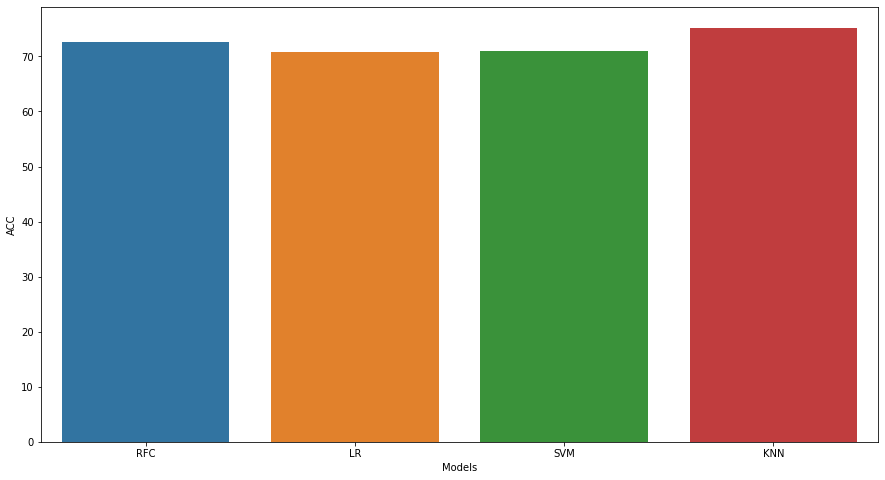

In [51]:
import math
from math import log


plt.figure(figsize=(15, 8))
# Ranmodel, LR, Svcmodel, Knnmodel
data = pd.DataFrame({'Models': ['RFC','LR','SVM', 'KNN'],'ACC':[Ranmodel.score(x_test,y_test)*100,
                                                              LR.score(x_test,y_test)*100,
                                                              Svm_model.score(x_test,y_test)*100,
                                                              Knnmodel.score(x_test,y_test)*100]})
sns.barplot(data['Models'],data['ACC'])

In [ ]:
import keras
from keras.models import Sequential
from keras.layers import Dense

In [ ]:
# creating the model
model = Sequential()

# first hidden layer
model.add(Dense(output_dim = 8, init = 'uniform', activation = 'relu', input_dim = 11))

# second hidden layer
model.add(Dense(output_dim = 8, init = 'uniform', activation = 'relu'))

# output layer
model.add(Dense(output_dim = 1, init = 'uniform', activation = 'sigmoid'))

# Compiling the NN
# binary_crossentropy loss function used when a binary output is expected
model.compile(optimizer = 'adam', loss = 'binary_crossentropy', metrics = ['accuracy']) 

model.fit(x_train, y_train, batch_size = 10, nb_epoch = 100)